In [42]:
import os
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
def read_results(directory):
    contents = os.listdir(f'{directory}/rankings')
    results={}
    for c in contents:
        possible_subdir = f'{directory}/rankings/{c}'
        if os.path.isdir(possible_subdir):
            fs = os.listdir(possible_subdir)
            for fname in fs:
                if fname.endswith('json'):
                    with open(f'{possible_subdir}/{fname}','r') as inf:
                        results[c] = json.load(inf)
    return results

In [95]:
def hash_result(sres,ks):
    mp = {}
    for b in ['node_bindings','edge_bindings']:
        for qid,nodes in sres[b].items():
            if qid not in ks:
                continue
            nids = [n['id'] for n in nodes if not n['id'].startswith('connect') ]
            nids.sort()
            mp[qid] = nids
    j = json.dumps(mp,sort_keys=True)
    return hash(j),mp

In [96]:
def extract_scores(xresults):
    scoremap = defaultdict(dict)
    rmap = {}
    keys = set()
    for tool, message in xresults.items():  
        qg = message['message']['query_graph']
        keys.update(qg['nodes'].keys())
        keys.update(qg['edges'].keys())
        for r in message['message']['results']:
            h,j = hash_result(r,keys)
            scoremap[h][tool] = r['score']
            rmap[h] = j
    return scoremap,rmap

In [97]:
def compare(dirname):
    results = read_results(dirname)
    scoremap,rmap = extract_scores(results)
    cmp = pd.DataFrame(scoremap)
    cmp = cmp.transpose()
    ranks = pd.DataFrame(index = cmp.index)
    cols = cmp.columns
    for c in cols:
        ranks[f'{c}_rank'] = cmp[c].rank(ascending=False)
    return results,cmp,ranks,rmap

In [114]:
def print_result(r,bindings,results):
    kg = results['ranking_agent']['message']['knowledge_graph']
    for k,bound in bindings[r].items():
        for b in bound:
            if b in kg['nodes']:
                print(f'{k}: {kg["nodes"][b]["name"]}')
            if b in kg['edges']:
                print(f"{k}: {kg['edges'][b]['predicate']}")

In [98]:
results,cmp,ranks,bindings = compare('clinical_DCP')

In [99]:
cmp

,improving_agent,ranking_agent,ARAX
7179088916086773162,0.132144,0.267949,0.130435
-8438318089113906694,0.166740,0.268633,0.782609
8734029328832291106,0.286745,0.271378,0.956522
4146387695298930623,0.161479,0.272059,0.739130
-4917474002798554633,0.132144,0.272665,0.608696
-3006523345446516541,0.132144,0.271814,0.521739
7543339398334049009,0.174821,0.279633,0.565217
-5501973241691705763,0.132144,0.267949,0.695652
1430363372842529810,0.172304,0.275780,0.478261
-8612014295855901986,0.161401,0.301491,0.913043


In [100]:
ranks

,improving_agent_rank,ranking_agent_rank,ARAX_rank
7179088916086773162,17.0,18.5,22.0
-8438318089113906694,7.0,12.0,6.0
8734029328832291106,2.0,9.0,2.0
4146387695298930623,8.0,7.0,7.0
-4917474002798554633,17.0,6.0,10.0
-3006523345446516541,17.0,8.0,12.0
7543339398334049009,3.0,3.0,11.0
-5501973241691705763,17.0,18.5,8.0
1430363372842529810,4.0,4.0,13.0
-8612014295855901986,9.0,2.0,3.0


In [101]:
cmp.corr(method='pearson')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.713708,0.580143
ranking_agent,0.713708,1.000000,0.451086
ARAX,0.580143,0.451086,1.000000


In [102]:
cmp.corr(method='spearman')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.705306,0.531031
ranking_agent,0.705306,1.000000,0.623375
ARAX,0.531031,0.623375,1.000000


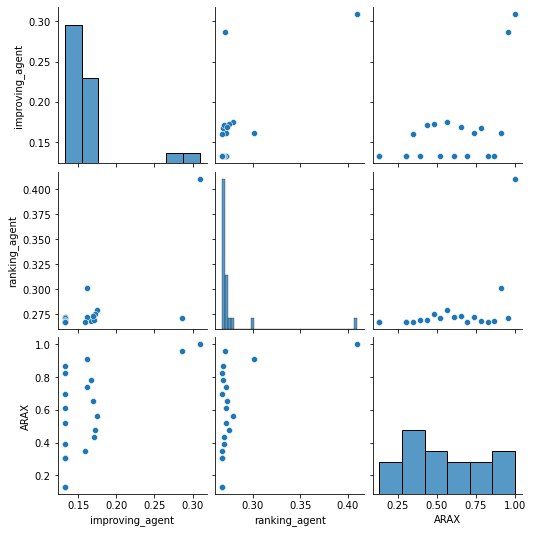

In [103]:
sns.pairplot(cmp)

In [115]:
print_result(-2376499315150854751,bindings,results)

n0: athetoid cerebral palsy
n1: cerebral palsy
e01: biolink:has_real_world_evidence_of_association_with
e01: biolink:has_real_world_evidence_of_association_with


In [116]:
print_result(8734029328832291106,bindings,results)

n0: athetoid cerebral palsy
n1: spastic quadriplegia
e01: biolink:has_real_world_evidence_of_association_with
e01: biolink:has_real_world_evidence_of_association_with


In [117]:
cmpf = cmp[ cmp['improving_agent'] < 0.25 ]

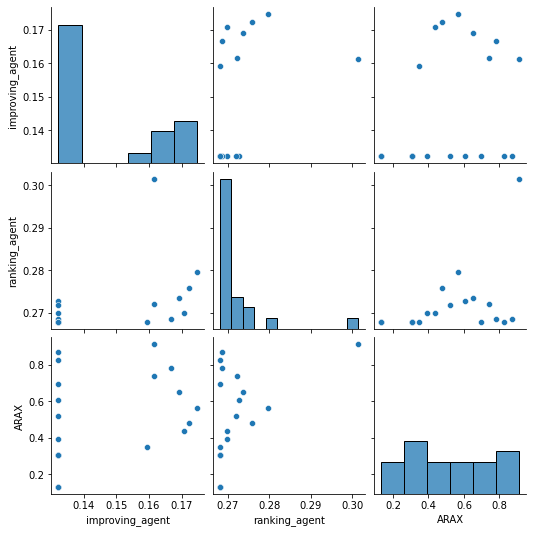

In [118]:
sns.pairplot(cmpf)

In [119]:
cmpf.corr()

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.451779,0.349397
ranking_agent,0.451779,1.000000,0.460163
ARAX,0.349397,0.460163,1.000000


In [120]:
results,cmp,ranks,bindings = compare('genes_genetically_associated_to_asthma')

In [121]:
cmp.corr()

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.083328,0.330861
ranking_agent,0.083328,1.000000,0.494161
ARAX,0.330861,0.494161,1.000000


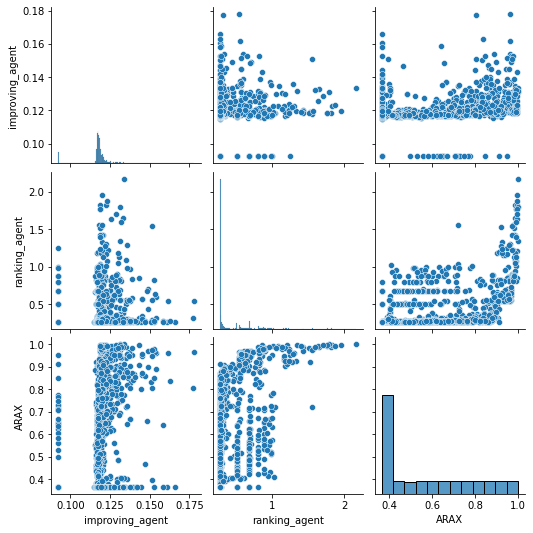

In [122]:
sns.pairplot(cmp)

In [123]:
cmp.corr(method='spearman')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.321986,0.453068
ranking_agent,0.321986,1.000000,0.776448
ARAX,0.453068,0.776448,1.000000


In [125]:
cmpf = cmp[ cmp['improving_agent'] > 0.1 ]

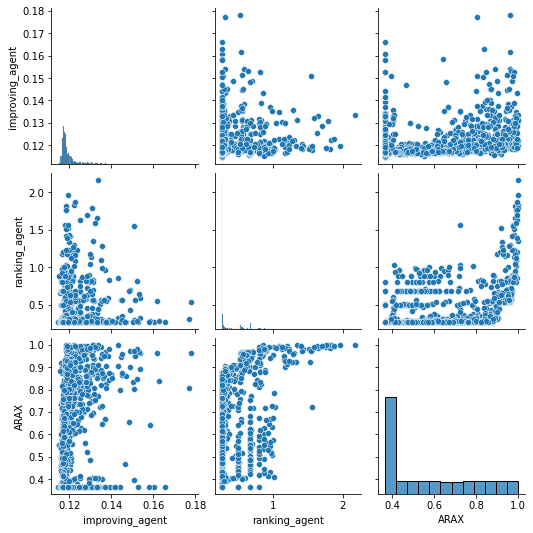

In [126]:
sns.pairplot(cmpf)

In [127]:
cmpf.corr(method='spearman')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.336555,0.455105
ranking_agent,0.336555,1.000000,0.795080
ARAX,0.455105,0.795080,1.000000


In [128]:
cmpf.corr(method='pearson')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.146592,0.372750
ranking_agent,0.146592,1.000000,0.501841
ARAX,0.372750,0.501841,1.000000


In [129]:
results,cmp,ranks,bindings = compare('treats_hyperlipidemia')

In [130]:
cmp.corr(method='spearman')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,0.055877,0.217451
ranking_agent,0.055877,1.000000,0.367236
ARAX,0.217451,0.367236,1.000000


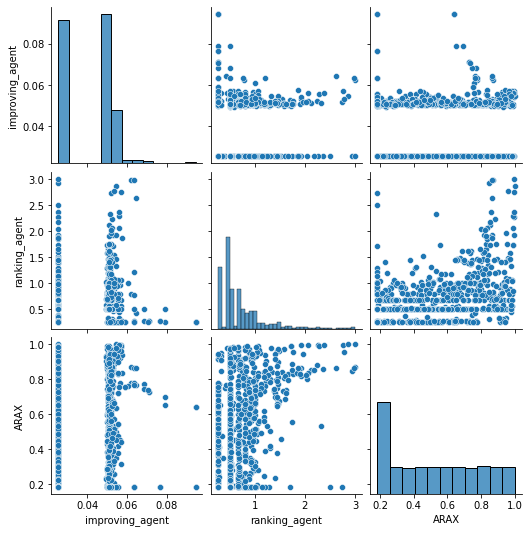

In [131]:
sns.pairplot(cmp)

In [132]:
cmpf = cmp[ cmp['improving_agent'] > 0.04 ]

In [133]:
cmpf.corr(method='spearman')

,improving_agent,ranking_agent,ARAX
improving_agent,1.000000,-0.077318,0.206200
ranking_agent,-0.077318,1.000000,0.387356
ARAX,0.206200,0.387356,1.000000


In [134]:
results,cmp,ranks,bindings = compare('two_hop_acromegaly')

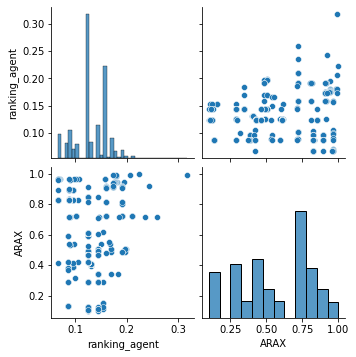

In [136]:
sns.pairplot(cmp)

In [137]:
cmp.corr(method='spearman')

,ranking_agent,ARAX
ranking_agent,1.000000,0.254867
ARAX,0.254867,1.000000


In [138]:
cmp[cmp['ranking_agent']>0.3]

,ranking_agent,ARAX
9050147629054979875,0.317753,0.992177


In [139]:
print_result(9050147629054979875,bindings,results)

n0: acromegaly
n1: AHR
n2: 2,3,7,8-Tetrachlorodibenzo-p-dioxin
e01: biolink:gene_associated_with_condition
e01: biolink:gene_associated_with_condition
e02: biolink:activity_increased_by


In [141]:
cmp[cmp['ARAX']>0.98]

,ranking_agent,ARAX
9050147629054979875,0.317753,0.992177
7149956451904419820,0.223493,1.000000
-3337961716594597801,0.206029,0.991837
2005494629412187788,0.180059,0.981293
-2847997150996720722,0.180059,0.981293
-982491279977195627,0.180059,0.981293
2555926933446686781,0.180059,0.981293
8384552067800888776,0.180059,0.981293
-1183077307639839652,0.180059,0.981293
4696088897060405360,0.180059,0.981293


In [142]:
print_result(7149956451904419820,bindings,results)

n0: acromegaly
n1: SSTR2
n2: N-[(2R,3S)-1-[[(1R,3R)-3-(Aminomethyl)cyclohexyl]methylamino]-3-(1H-indol-3-yl)-1-oxobutan-2-yl]-4-(2-oxo-3H-benzimidazol-1-yl)piperidine-1-carboxamide
e01: biolink:gene_associated_with_condition
e01: biolink:genetic_association
e02: biolink:activity_increased_by
